# ggrepel

- geom_text_repel()
- geom_label_repel()

These functions apply a force-based layout algorithm to text labels, resolving overlaps by dynamically repositioning them. Labels repel each other, associated data points, and are constrained to remain within the plotting area.


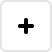
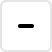
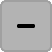
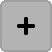
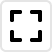
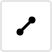
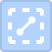
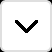
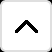
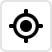
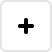
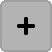
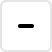
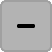
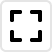
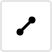
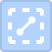
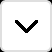
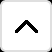
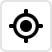

In [1]:
from lets_plot import *

import numpy as np
import pandas as pd
import random

LetsPlot.setup_html() 

In [2]:
mtcars = pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv")

In [3]:
dat = mtcars[mtcars['wt'] > 2.0]
dat = dat[dat['wt'] < 3.65]

dat2 = mtcars[mtcars['wt'] > 2.5]
dat2 = dat[dat['wt'] < 3]

dat3 = dat2[dat2['model'] == 'Fiat 128']

### Comparison of geom_text() and geom_text_repel()

In [4]:
plot = ggplot(dat2, aes('wt', 'mpg', label = 'model')) + geom_point(color = "red")
gggrid([
    plot + geom_text() + ggtitle('geom_text()'), 
    plot + geom_text_repel() + ggtitle('geom_text_repel()'),
])

### geom_label_repel()
All of the parameters discussed below apply equally to both `geom_text_repel()` and `geom_label_repel()`. For simplicity, we will use `geom_text_repel()` in the examples.

In [5]:
plot = ggplot(dat2, aes('wt', 'mpg', label = 'model')) + geom_point(color = "red")
gggrid([
    plot + geom_label() + ggtitle('geom_label()'), 
    plot + geom_label_repel() + ggtitle('geom_label_repel()'),
])

### `seed` parameter 
Controls the randomization to produce the same label layout each time the plot is generated.

In [6]:
plot2 = ggplot(dat2, aes('wt', 'mpg', label = 'model')) + geom_point(color = "red")
gggrid([
    plot2 + geom_text_repel() + ggtitle('Without seed'), 
    plot2 + geom_text_repel() + ggtitle('Without seed'),
    plot2 + geom_text_repel(seed=4) + ggtitle('With seed'), 
    plot2 + geom_text_repel(seed=4) + ggtitle('With seed'),
], ncol=2)

In some cases, it may be necessary to find a seed value that produces a more optimal label arrangement. A simple approach is to re-render the plot multiple times until you're satisfied with the result, then use the corresponding seed to reproduce it.

In [7]:
rand_int = random.randint(1, 1000)
print("seed =", rand_int)
plot2 + geom_text_repel(seed=rand_int)

seed = 869


### `max_iter` parameter
Controls the maximum number of iterations used by the layout algorithm, helping to reduce notebook rendering time. More iterations generally lead to better label placement, but at the cost of increased computation time. For plots with a small number of labels, 200–300 iterations are often sufficient.
The default value is 2000.

In [8]:
seed = 530
gggrid([
    plot2 + geom_text_repel(seed=seed, max_iter=2) + ggtitle('max_iter=2'), 
    plot2 + geom_text_repel(seed=seed, max_iter=20) + ggtitle('max_iter=20'),
    plot2 + geom_text_repel(seed=seed, max_iter=200) + ggtitle('max_iter=200'),
])

### `max_time` parameter
Another way to limit plot rendering time is by using the `max_time` parameter. This primarily serves as a safeguard against excessive computation when a large number of text labels are involved. The default value is `5` seconds, but you can disable the time limit by setting it to `-1` if needed.

In [9]:
gggrid([
    plot2 + geom_text_repel(seed=seed, max_time=0.001) + ggtitle('max_time=0.001'), 
    plot2 + geom_text_repel(seed=seed, max_time=0.01) + ggtitle('max_time=0.01'),
    plot2 + geom_text_repel(seed=seed, max_time=-1) + ggtitle('max_time=-1'),
])

### `direction` parameter
Restricts the movement of a text label relative to its anchor point to a specific direction. The default value is `both`.

In [10]:
gggrid([
    plot2 + geom_text_repel(seed=seed, direction='x') + ggtitle('direction = x'), 
    plot2 + geom_text_repel(seed=seed, direction='y') + ggtitle('direction = y'),
    plot2 + geom_text_repel(seed=seed, direction='both') + ggtitle('direction = both'),
])

As we can see, this option is of limited use for randomly scattered points, but in certain cases it can be extremely helpful:

In [11]:
plotX = ggplot(dat2) + geom_point(aes(x='wt', label = 'model'), y = 1, color='red') + xlim(2, 3) + ylim(1, 1.3) + \
    geom_text_repel(
        aes(x='wt', label = 'model'), 
        y = 1, 
        nudge_y = 0.05, 
        direction = 'x', 
        angle = 90,
        hjust = 0.0,
        seed = seed
    ) 

plotY = ggplot(dat2) + geom_point(aes(y='mpg', label = 'model'), x = 1, color='red') + xlim(0.9, 1.3) + ylim(19, 35) + \
    geom_text_repel(
        aes(y='mpg', label = 'model'), 
        x = 1, 
        nudge_x = 0.05, 
        direction = 'y', 
        hjust = 0.0,
        seed = seed
    ) 
gggrid([
    plotX + ggtitle('direction = x'), 
    plotY + ggtitle('direction = y'),    
])

### `point_padding` and `box_padding` parameters
These parameters control the amount of spacing around text labels.

- `point_padding` adds space between the label and all nearby points, but does not affect spacing between labels.

- `box_padding` adds space between labels, but does not affect spacing between the label and the data point.

In [12]:
gggrid([
    plot + geom_text_repel(seed=seed, max_time=-1, point_padding=10) + ggtitle('point_padding'), 
    plot + geom_text_repel(seed=seed, max_time=-1, box_padding=10) + ggtitle('box_padding'),    
])

### `max_overlaps` parameter
Specifies the maximum allowed number of overlaps with other labels. Labels that exceed this threshold will be omitted from the plot. The default value is `10`. You can disable overlap filtering entirely by setting this parameter to `-1`.

In [13]:
gggrid([
    plot + geom_text_repel(seed=seed, max_time=-1, max_overlaps=5) + ggtitle('max_overlaps=5'), 
    plot + geom_text_repel(seed=seed, max_time=-1, max_overlaps=-1) + ggtitle('max_overlaps=-1'),    
])

### `min_segment_length` parameter
Sets the minimum length for the line connecting a label to its associated point. Lines shorter than this threshold will not be drawn.
To display all lines, set this parameter to `0`.
To hide all lines, set the value to something very large.

In [14]:
gggrid([
    plot + geom_text_repel(seed=seed, max_time=-1, min_segment_length=0) + ggtitle('min_segment_length=0'), 
    plot + geom_text_repel(seed=seed, max_time=-1, min_segment_length=9999) + ggtitle('min_segment_length=9999'),    
])

### `point_size` aesthetic
Allows you to pass to geom_text_repel() the data used to determine point sizes in a geom_point() layer. This helps accurately detect overlaps between labels and points when point sizes vary.

In [15]:
plot3 = ggplot(dat2, aes('wt', 'mpg', label = 'model')) + geom_point(aes(size='gear'), color = "red") + theme(legend_position='none')
gggrid([
    plot3 + geom_text_repel(seed=seed, max_time=-1) + ggtitle('without point_size'), 
    plot3 + geom_text_repel(aes(point_size='gear'), seed=seed, max_time=-1) + ggtitle('with point_size'),    
])

You can also provide a constant value instead.

In [16]:
plot3 = ggplot(dat2, aes('wt', 'mpg', label = 'model')) + geom_point(size = 10, color = "red") + theme(legend_position='none')
gggrid([
    plot3 + geom_text_repel(seed=seed, max_time=-1) + ggtitle('without point_size'), 
    plot3 + geom_text_repel(seed=seed, max_time=-1, point_size = 10) + ggtitle('with point_size'),    
])